<a href="https://colab.research.google.com/github/Joyschool/gachon-algorithm-2025/blob/main/_03_%EC%A0%90%ED%99%94%EC%8B%9D%EA%B3%BC%EC%9E%AC%EA%B7%80_%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

점화식과 재귀 알고리즘



---



# 1.알고리즘 분석을 위한 기초



---



## 알고리즘 효율성 분석

### @알고리즘 효율성 측정 (시간 성능 분석)

In [ ]:
# time 모듈을 이용한 실행시간 측정
def test(n):
    l = []
    for i in range(n):
        l.append(i)

import time
start = time.time()
test(1000)
end = time.time()
print(f"실행시간 = {end-start}")

실행시간 = 0.00010347366333007812


### [실습] 성능 비교하기
데이터를 리스트에 추가하는 다양한 방법의 성능을 측정하고 그래프로 비교해 보세요.

In [ ]:
# 1.append() 메서드
def test1(n):
    l = []
    for i in range(n):
        l.append(i)

# 2.extend() 메서드
def test2(n):
    l = []
    for i in range(n):
        l.extend([i])

# 3.리스트 연결 연산자
def test3(n):
    l = []
    for i in range(n):
        l = l + [i]

# 4.리스트 조건제시법
def test4(n):
    l = [i for i in range(n)]

# 5.range 객체 활용
def test5(n):
    l = list(range(n))

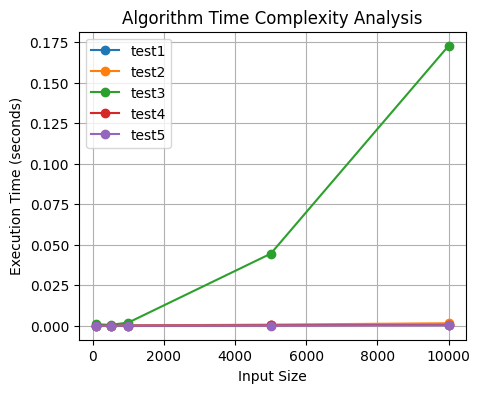

In [ ]:
# 코드 작성
import time
import random
import matplotlib.pyplot as plt

# 실행 시간 측정 함수
def measure_time(sort_funcs, n):
    times = []
    for sort_func in sort_funcs:
        start = time.time()
        sort_func(n)
        end = time.time()
        times.append(end - start)
    return times

def benchmark():
    sizes = [100, 500, 1000, 5000, 10000]
    # sizes = [100, 500, 1000]
    sort_funcs = [test1, test2, test3, test4, test5]
    func_times = [[] for _ in sort_funcs]

    # 실행 시간 측정
    for size in sizes:
        results = measure_time(sort_funcs, size)
        for idx, val in enumerate(results):
            func_times[idx].append(val)

    # 그래프 그리기
    plt.figure(figsize=(5, 4))
    for idx, sort_func in enumerate(sort_funcs):
        plt.plot(sizes, func_times[idx], label=f"{sort_func.__name__}", marker='o')

    plt.xlabel("Input Size")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Algorithm Time Complexity Analysis")
    plt.legend()
    plt.grid(True)
    plt.show()

# 함수 호출
benchmark()



---



## 복잡도 분석

- **복잡도 분석에서 중요한 점**
    - 알고리즘에서 **입력의 크기**는 무엇인가?
    - 복잡도에 영향을 미치는 가장 핵심적인 **기본 연산**은 무엇인가?
    - 입력의 크기가 증가함에 따라 처리 **시간은 어떤 형태로 증가**하는가?
    - **입력의 특성에 따라 알고리즘 효율성**에는 어떤 차이가 있는가?

### @기본 연산(Basic Operation)
- 알고리즘에서 가장 중요한(많이 수행되는) 연산
    - 다중 루프의 경우 가장 안쪽 루프에 있는 연산
    - 이 연산이 실행되는 횟수 만을 계산

### @복잡도 함수
- **어떤 형태로 증가하는가를 나타내는 함수**
- 입력의 크기에 대한 기본 연산의 수행 횟수를 나타냄 → $T_{A}(n)=2, T_{B}(n)=2n, T_{C}(n)=2n^2$  → 근사적으로 계산

- 입력의 종류 또는 구성에 따라 다른 특성의 실행시간
    - 최선의 경우(best case) → 실행시간이 가장 짧음, 큰 의미 없음
    - 평균적인 경우(average case) → 평균적 실행시간, 정확히 계산하기 어렵다
    - **최악의 경우(worst case)** → 입력의 구성에 따른 실행시간, 가장 중요



---



## 점근적 표기법

- 점근적 표기법(Asymptotic Notation)
    - 여러 항을 갖는 복잡도 함수를 최고차항만을 계수 없이 취해 단순하게 표현하는 방법
    - 증가속도를 표현

### [실습] 빅오 표기법 다양한 복잡도 함수 예

In [ ]:
import math
import itertools

# O(1) - 상수 시간
def constant_time_example(arr):
    return arr[0]  # 배열의 첫 번째 원소 접근 (항상 일정한 시간)

# O(log n) - 로그 시간 (이진 탐색)
def log_time_example(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1  # 요소를 찾을 수 없는 경우

# O(n) - 선형 시간 (리스트에서 특정 값 찾기)
def linear_time_example(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

# O(n log n) - 퀵정렬 또는 병합정렬
def nlogn_time_example(arr):
    return sorted(arr)  # Timsort (Python 내장 정렬 알고리즘)

# O(n^2) - 버블 정렬
def quadratic_time_example(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

# O(n^3) - 3중 루프 (브루트포스 트리플렛 합 찾기)
def cubic_time_example(arr):
    n = len(arr)
    count = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                if arr[i] + arr[j] + arr[k] == 0:
                    count += 1
    return count

# O(2^n) - 피보나치 수열 (재귀)
def exponential_time_example(n):
    if n <= 1:
        return n
    return exponential_time_example(n - 1) + exponential_time_example(n - 2)

# O(3^n) - 3^n 성능을 가지는 재귀 함수 예제
def triple_exponential_example(n):
    if n == 0:
        return 1
    return triple_exponential_example(n - 1) + triple_exponential_example(n - 1) + triple_exponential_example(n - 1)

# O(n!) - 순열 생성 (브루트포스 탐색)
def factorial_time_example(n):
    return list(itertools.permutations(range(n)))  # 모든 순열을 생성

# 테스트 실행
if __name__ == "__main__":
    arr = [1, 2, 3, 4, 5]
    print("O(1):", constant_time_example(arr))
    print("O(log n):", log_time_example(arr, 3))
    print("O(n):", linear_time_example(arr, 4))
    print("O(n log n):", nlogn_time_example(arr))
    print("O(n^2):", quadratic_time_example(arr))
    print("O(n^3):", cubic_time_example(arr))
    print("O(2^n):", exponential_time_example(5))
    print("O(3^n):", triple_exponential_example(5))
    print("O(n!):", len(factorial_time_example(5)))  # 생성된 순열 개수 출력



O(1): 1
O(log n): 2
O(n): 3
O(n log n): [1, 2, 3, 4, 5]
O(n^2): [1, 2, 3, 4, 5]
O(n^3): 0
O(2^n): 5
O(3^n): 243
O(n!): 120




---



# 2.재귀 알고리즘

## 점화식

### @점화식 분석 방법

### @점화식에서 사용되는 연산(연산 유형별 점화식 예)


상수 연산
- 점화식 : $T(n)=O(1)$
- 빅오표기 : $O(1)$ 상수시간

In [ ]:
def constant_operation(n):
    result = n * 2 + 5  # 고정된 연산 수행
    return result

print(constant_operation(100))


선형 반복문(Iterative Operations)
- 점화식 : $T(n)=T(n−1)+O(1)$
- 빅오표기 : $O(n)$ 선형 시간

In [ ]:
def linear_operation(n):
    total = 0
    for i in range(n):  # n번 반복
        total += i
    return total

print(linear_operation(100))


이중 루프(Nested Loops)
- 점화식 : $T(n)=T(n−1)+O(n)$
- 빅오표기 : $O(n^2)$ 이차 시간

In [ ]:
def quadratic_operation(n):
    count = 0
    for i in range(n):
        for j in range(n):  # n * n번 반복
            count += i + j
    return count

print(quadratic_operation(100))


로그 연산(Logarithmic Operations)
- 점화식 : $T(n)=T(n/2)+O(1)$
- 빅오표기 : $O(logn)$

In [ ]:
def binary_search(arr, target, left, right):
    if left > right:
        return -1
    mid = (left + right) // 2
    if arr[mid] == target:
        return mid
    elif arr[mid] < target:
        return binary_search(arr, target, mid + 1, right)
    else:
        return binary_search(arr, target, left, mid - 1)

arr = [1, 3, 5, 7, 9, 11, 13, 15]
print(binary_search(arr, 7, 0, len(arr) - 1))


분할 정복(Divide and Conquer)
- 점화식 : $T(n)=2T(n/2)+O(n)$
- 빅오표기 : $O(nlogn)$

In [ ]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    return merge(left, right)

def merge(left, right):
    sorted_arr = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            sorted_arr.append(left[i])
            i += 1
        else:
            sorted_arr.append(right[j])
            j += 1
    sorted_arr.extend(left[i:])
    sorted_arr.extend(right[j:])
    return sorted_arr

arr = [5, 3, 8, 1, 2, 7, 6, 4]
print(merge_sort(arr))


지수 연산(Exponential Operations)
- 점화식 : $T(n)=T(n−1)+T(n−2)+O(1)$
- 빅오표기 : $O(2^n)$

In [ ]:
def fibonacci(n):
    if n <= 1:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)

print(fibonacci(13))


233


### [실습] 피보나치의 토끼 번식 문제
- 1년이 지난 후(13월) 전체 토끼의 쌍의 수는?     
- 점화식은? $T(n) = T(n-1) + T(n-2) + O(1)$ / $R(n) = R(n-1) + R(n-2)$
- 빅오 표기법은? $O(2^n)$
- 파이썬으로 구현 하시오.

In [ ]:
def fibonacci_loop(months, offsprings):

    parent, child = 1, 0
    print(f'month:{1}, parent:{parent}, child:{child}')

    for i in range(2, months+1):
        child, parent = parent, parent + (child * offsprings)
        print(f'month:{i}, parent:{parent}, child:{child}')

    return child+parent

fibonacci_loop(13, 1)  # months, offsprings = 월, 자손

month:1, parent:1, child:0
month:2, parent:1, child:1
month:3, parent:2, child:1
month:4, parent:3, child:2
month:5, parent:5, child:3
month:6, parent:8, child:5
month:7, parent:13, child:8
month:8, parent:21, child:13
month:9, parent:34, child:21
month:10, parent:55, child:34
month:11, parent:89, child:55
month:12, parent:144, child:89
month:13, parent:233, child:144


377

In [ ]:
# 반복문 이용
def fibonacci(n):
    if n <= 0:
        return 1
    elif n == 1:
        return 1
    else:
        a, b = 1, 0   # 부모, 자식
        for i in range(2, n+1):
            a, b = a + b, a
        return a + b

fibonacci(13)

377

In [ ]:
# 재귀 호출 이용
def fibonacci_recursive(n):
    if n <= 0:
        return 1  # 시작 조건
    elif n == 1:
        return 1
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)
fibonacci_recursive(13)

377



---



## 재귀 알고리즘

### @순환 호출
- 팩토리얼(factorial)

In [ ]:
def factorial(n):
    if n == 1: return 1
    return n*factorial(n-1)

factorial(3)

- 하노이의 탑

In [ ]:
cnt = 0 #  원판 옮긴 횟수
def moveHanoi_1(n, start, end):
    global cnt
    other = 6 - (start+end)  # 보조 기둥 번호,  계산식: 1+2+3 = 6
    if n == 1:
        print(f'{n} 번 디스크: {start} --> {end} 이동')
        cnt += 1
        return 0
    else:
        moveHanoi_1(n-1, start, other)
        print(f'{n} 번 디스크: {start} --> {end} 이동')
        cnt += 1
        moveHanoi_1(n-1, other, end)

num = int(input('원판 개수: '))
moveHanoi_1(num, 1, 3)   # 원판개수, start기둥, end기둥
print(f'원판 옮긴 횟수: {cnt}')

원판 개수: 5
1 번 디스크: 1 --> 3 이동
2 번 디스크: 1 --> 2 이동
1 번 디스크: 3 --> 2 이동
3 번 디스크: 1 --> 3 이동
1 번 디스크: 2 --> 1 이동
2 번 디스크: 2 --> 3 이동
1 번 디스크: 1 --> 3 이동
4 번 디스크: 1 --> 2 이동
1 번 디스크: 3 --> 2 이동
2 번 디스크: 3 --> 1 이동
1 번 디스크: 2 --> 1 이동
3 번 디스크: 3 --> 2 이동
1 번 디스크: 1 --> 3 이동
2 번 디스크: 1 --> 2 이동
1 번 디스크: 3 --> 2 이동
5 번 디스크: 1 --> 3 이동
1 번 디스크: 2 --> 1 이동
2 번 디스크: 2 --> 3 이동
1 번 디스크: 1 --> 3 이동
3 번 디스크: 2 --> 1 이동
1 번 디스크: 3 --> 2 이동
2 번 디스크: 3 --> 1 이동
1 번 디스크: 2 --> 1 이동
4 번 디스크: 2 --> 3 이동
1 번 디스크: 1 --> 3 이동
2 번 디스크: 1 --> 2 이동
1 번 디스크: 3 --> 2 이동
3 번 디스크: 1 --> 3 이동
1 번 디스크: 2 --> 1 이동
2 번 디스크: 2 --> 3 이동
1 번 디스크: 1 --> 3 이동
원판 옮긴 횟수: 31


### [실습] 재귀 알고리즘 적용하기

- countdown(n) : 5->4->3->2->1->'발사' 순서로 출력하기

In [ ]:
# Countdown : 5->4->3->2->1->'발사' 순서로 출력하기)
def countdown(n):
    if n==0 :
        print('발사!')
    else:
        print(n, end='->')
        countdown(n-1)

countdown(5)

- printStar(n) : 별 모양 출력하기

In [ ]:
'''
*
**
***
****
*****
'''
def printStar(n):
    if n > 0:
        printStar(n-1)
        print('⭐'*n)

print( printStar(5) )

- addNumber(n) : 1~10까지 합계 구하기

In [ ]:
def addNumber(n):
    if n==1:
        return 1
    return n + addNumber(n-1)

print( addNumber(10) )

- sum_range(start, end) : 임의의 두 수 사이의 정수 합계 구하기 (1~100 정수)

In [ ]:
def sum_recursive(a, b):
    # 기저 사례 (Base Case): a == b이면 자기 자신을 반환
    if a == b:
        return a

    # 재귀 호출: (a ~ b)의 합은 a + (a+1 ~ b)의 합
    return a + sum_recursive(a + 1, b)

import random
a = random.randint(1, 100)
b = random.randint(1, 100)
if a > b:
    a, b = b, a      # 작은 값부터 시작
print(f'{a} ~ {b} 사이의 숫자합 = {sum_recursive(a, b)}')

70 ~ 72 사이의 숫자합 = 213


- reverse(s) : 문자열 뒤집기  

In [ ]:
def reverse(s):
    if len(s) == 0:
        return s
    else:
        return reverse(s[1:]) + s[0]
s = input('문자열 입력: ')
print( reverse(s) )

문자열 입력: 문자열 뒤집기
기집뒤 열자문




---



## 재귀 응용

### @회문(Palindrome)여부 판단하기
- 회문(Palindrome): 앞에서부터 읽든, 뒤에서부터  읽든 동일한 단어나 문장을 의미

In [ ]:
# 회문 테스트용 문자열
strings = ['level','radar','kayak','I prefer pi',
         '기러기','일요일','주유소의 소유주','야 너 이번 주 주번이 너야']
strings = ['reaver', 'level','기러기','살금 살금']

### [실습문제] 문자열 회문 여부 판단하기

In [ ]:
# 1.리스트 인덱스를 이용한 체크
def is_palindrome(tStrings):  # 회문 여부 판별
    for tStr in tStrings:
        tStr = tStr.lower().replace(' ','')  # 소문자->공백제거
        if tStr == tStr[::-1]:               # 역순정렬/reverse함수 사용
            print(f"{tStr}\t--> True")
        else:
            print(f"{tStr}\t--> False")

is_palindrome(['reaver', 'level','기러기','살금 살금'])

reaver	--> False
level	--> True
기러기	--> True
살금살금	--> False


### [실습문제] 문자열 회문여부 판단하기(재귀 알고리즘 사용)

In [ ]:
# 2.재귀 알고리즘 사용
def palindrome(tStr):         # 재귀방법으로 회문 여부 체크
    if len(tStr) <= 1:                      # Base case --> 문자열 길이가 1이하면
        return True
    if tStr[0] != tStr[-1]:                 # 첫 글자&끝 글자가 동일한지 체크
        return False
    return palindrome(tStr[1:len(tStr)-1])  # 재귀 호출


def is_palindrome(tStrings):  # 회문 여부 판별
    for tStr in tStrings:                    # 문자열 하나씩 읽기
        tStr = tStr.lower().replace(' ','')  # 소문자->공백제거
        if palindrome(tStr):                 # 판별 함수 호출
            print(f"{tStr} --> True")
        else:
            print(f"{tStr} --> False")

is_palindrome(['reaver', 'level','기러기','살금 살금'])

reaver --> False
level --> True
기러기 --> True
살금살금 --> False


-----------------------

### 2-2. 프랙탈 그리기

### [실습문제] 코흐 곡선(Koch Curve) 그리기
[주의!] turtle 모듈은 PC python IDLE 툴에서 안정적으로 작동한다.

In [ ]:
import turtle

def koch_curve(t, order, size):
    """
    t: 터틀 객체
    order: 재귀 횟수
    size: 선분 길이
    """
    if order == 0:
        t.forward(size)
    else:
        koch_curve(t, order-1, size/3)
        t.left(60)
        koch_curve(t, order-1, size/3)
        t.right(120)
        koch_curve(t, order-1, size/3)
        t.left(60)
        koch_curve(t, order-1, size/3)

def draw_koch_curve(order, size):
    t = turtle.Turtle()
    t.speed(0)      # 최대 속도로 그리기
    t.penup()
    t.goto(-200,0)  # 좌표 이동
    t.pendown()

    koch_curve(t, order, size)   # 그리기(터틀) 객체, 재귀호출 횟수, 변길이

# 코흐 커브 생성
draw_koch_curve(order=4, size=400)
turtle.exitonclick()
# turtle.mainloop()

### [실습문제] 시에르핀스키 삼각형

In [ ]:
import turtle

def sierpinski_triangle(t, order, size, p1, p2, p3):
    """
    t: 터틀 객체
    order: 반복 횟수
    size: 삼각형 한 변의 길이
    p1, p2, p3: 삼각형의 세 꼭짓점 좌표
    """
    if order == 0:
        # 삼각형 그리기
        t.up()
        t.goto(p1)
        t.down()
        t.goto(p2)
        t.goto(p3)
        t.goto(p1)
    else:
        # 새로운 꼭짓점 계산
        p12 = ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)
        p23 = ((p2[0] + p3[0]) / 2, (p2[1] + p3[1]) / 2)
        p31 = ((p3[0] + p1[0]) / 2, (p3[1] + p1[1]) / 2)

        # 재귀 호출
        sierpinski_triangle(t, order-1, size/2, p1, p12, p31)
        sierpinski_triangle(t, order-1, size/2, p12, p2, p23)
        sierpinski_triangle(t, order-1, size/2, p31, p23, p3)

def draw_sierpinski_triangle(order, size):
    t = turtle.Turtle()
    t.speed(0)  # 최대 속도로 그리기

    p1 = (-size/2, -size/(2 * (3**0.5)))
    p2 = (size/2, -size/(2 * (3**0.5)))
    p3 = (0, size/(3**0.5))

    sierpinski_triangle(t, order, size, p1, p2, p3)

# 시에르핀스키 삼각형 생성
draw_sierpinski_triangle(order=4, size=500)  # 재귀 깊이, 삼각형한 변의 길이
turtle.mainloop()

In [ ]:
import turtle

def draw_sierpinski(length, depth):
    if depth == 0:
        # 깊이가 0일 때, 삼각형 그리기
        for _ in range(3):
            turtle.forward(length)
            turtle.left(120)
    else:
        # 삼각형을 삼등분하여 시에르핀스키 삼각형 그리기
        draw_sierpinski(length / 2, depth - 1)
        turtle.forward(length / 2)
        draw_sierpinski(length / 2, depth - 1)
        turtle.backward(length / 2)
        turtle.left(60)
        turtle.forward(length / 2)
        turtle.right(60)
        draw_sierpinski(length / 2, depth - 1)
        turtle.left(60)
        turtle.backward(length / 2)
        turtle.right(60)

def main():
    turtle.speed(0)  # 속도 설정 (0: 가장 빠름, 1: 느림)
    turtle.penup()
    turtle.goto(-200, -100)
    turtle.pendown()
    draw_sierpinski(400, 4)  # 삼각형의 한 변의 길이와 재귀 깊이 설정
    turtle.hideturtle()
    turtle.done()

main()



---

